1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
def base_stat(x):
  mean_ = x.mean()
  median_ = x.median()
  mode_ = x.mode()[0]
  min_ = x.min()
  max_ = x.max()
  std_ = x.std()
  return f'среднее: {mean_}, медиана: {median_}, мода: {mode_}, мин: {min_}, макс: {max_}, сред.отклонение: {std_}'

print('satisfaction_level:', base_stat(df['satisfaction_level']))
print('last_evaluation:', base_stat(df['last_evaluation']))
print('number_project:', base_stat(df['number_project']))
print('average_montly_hours:', base_stat(df['average_montly_hours']))
print('time_spend_company:', base_stat(df['time_spend_company']))
print('Work_accident:', base_stat(df['Work_accident']))
print('left:', base_stat(df['left']))
print('promotion_last_5years:', base_stat(df['promotion_last_5years']))

satisfaction_level: среднее: 0.6128335222348156, медиана: 0.64, мода: 0.1, мин: 0.09, макс: 1.0, сред.отклонение: 0.24863065106114257
last_evaluation: среднее: 0.7161017401160078, медиана: 0.72, мода: 0.55, мин: 0.36, макс: 1.0, сред.отклонение: 0.17116911062327533
number_project: среднее: 3.80305353690246, медиана: 4.0, мода: 4, мин: 2, макс: 7, сред.отклонение: 1.2325923553183522
average_montly_hours: среднее: 201.0503366891126, медиана: 200.0, мода: 135, мин: 96, макс: 310, сред.отклонение: 49.94309937128408
time_spend_company: среднее: 3.498233215547703, медиана: 3.0, мода: 3, мин: 2, макс: 10, сред.отклонение: 1.4601362305354812
Work_accident: среднее: 0.1446096406427095, медиана: 0.0, мода: 0, мин: 0, макс: 1, сред.отклонение: 0.35171855238017985
left: среднее: 0.2380825388359224, медиана: 0.0, мода: 0, мин: 0, макс: 1, сред.отклонение: 0.4259240993802994
promotion_last_5years: среднее: 0.021268084538969265, медиана: 0.0, мода: 0, мин: 0, макс: 1, сред.отклонение: 0.1442814645785

# Как правильно расчитывать и показывать эти стратистики для dataframe? объясните пожалуйста, мой вариант работает, но он не читаемый и не оптимизированный

<ipython-input-90-f617521a4164>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

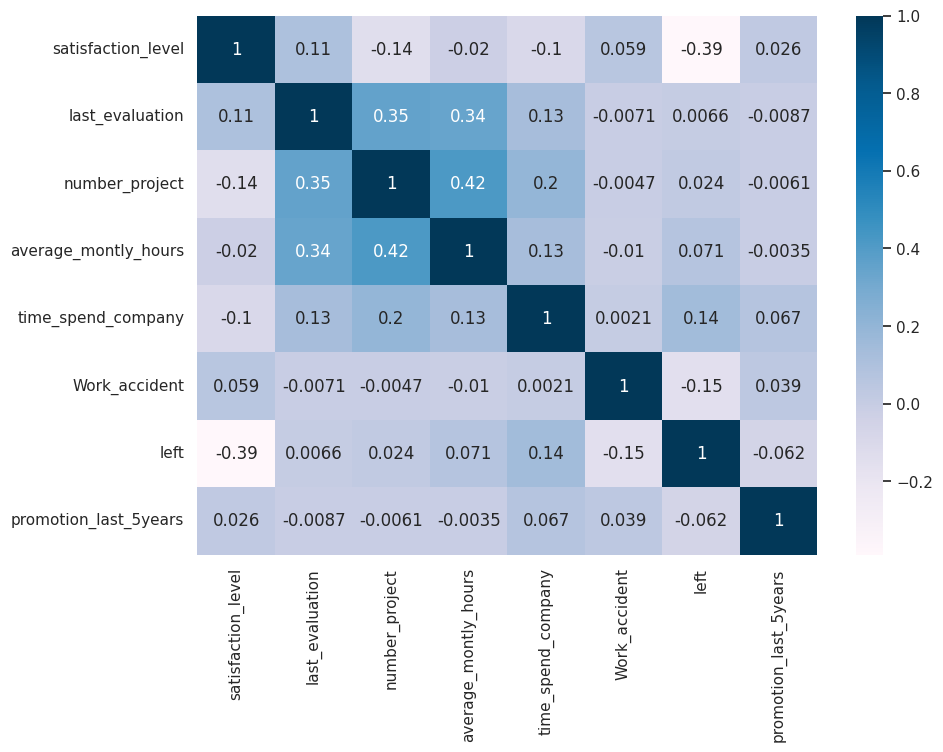

In [ ]:
# Рассчитайте и визуализировать корреляционную матрицу для количественных переменных
corr_matrix = df.corr()
plt.figure(figsize = (10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='PuBu')

По визуализации мы видим, что две наименее скоррелированные (-0,39)переменные это left и satisfactor_level. \
Две наиболее скоррелированные (0,42) переменные это average_monthly_hours и number_project.

* \
left - уволился ли сотрудник \
satisfaction_level - Уровень удовлетворенности работой \
* \
number_projects - Количество проектов, выполненных за время работы \
average_monthly_hours - Среднее количество часов на рабочем месте в месяц


In [ ]:
# Рассчитайте сколько сотрудников работает в каждом департаменте
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
# Показать распределение сотрудников по зарплатам.
salary_distribution = df['salary'].value_counts()
salary_distribution

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

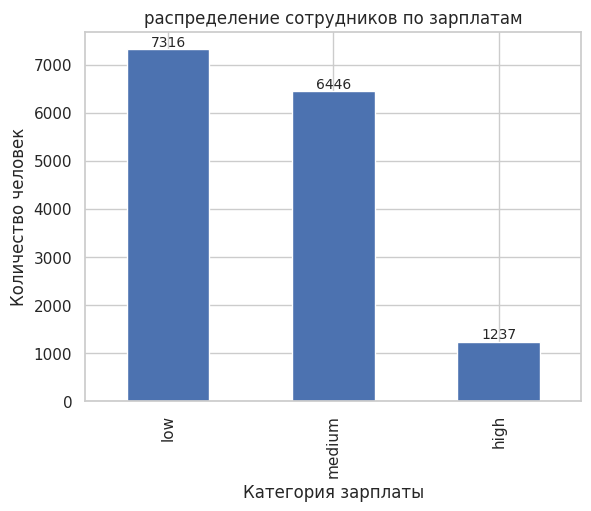

In [ ]:
salary_distribution.plot(kind = 'bar', title = 'распределение сотрудников по зарплатам',
                         xlabel = 'Категория зарплаты',
                         ylabel = 'Количество человек')
for i, val in enumerate(salary_distribution.values):
  plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

In [ ]:
# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
depart_salary = df[['department', 'salary']].groupby(['department', 'salary']).value_counts()
depart_salary

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64

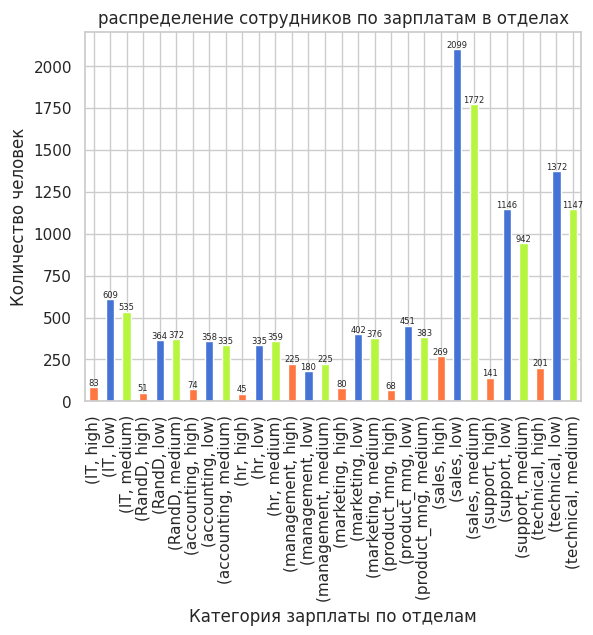

In [ ]:
depart_salary.plot(kind = 'bar', title = 'распределение сотрудников по зарплатам в отделах',
                         xlabel = 'Категория зарплаты по отделам',
                         ylabel = 'Количество человек',
                         color=['#FF7640', '#4573D5', '#B6F63E'])
for i, val in enumerate(depart_salary.values):
  plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size': 6})

In [ ]:
# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
# salary - относительный уровень зарплаты
# average_monthly_hours - Среднее количество часов на рабочем месте в месяц
high_salary = df.loc[df.salary == 'high', ['salary', 'average_montly_hours']]
high_salary.head()

,salary,average_montly_hours
72,high,149
111,high,289
189,high,156
267,high,129
306,high,149


In [ ]:
low_salary = df.loc[df.salary == 'low', ['salary', 'average_montly_hours']]
low_salary.head()

,salary,average_montly_hours
0,low,157
3,low,223
4,low,159
5,low,153
6,low,247


Text(0, 0.5, 'Work time')

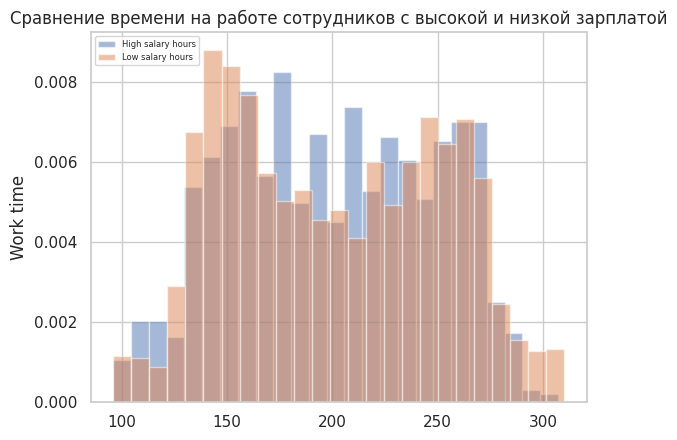

In [ ]:
high_salary['average_montly_hours'].plot(kind='hist',
                     alpha = 0.5,
                     bins=25,
                     density = True,
                     label='High salary hours')


low_salary['average_montly_hours'].plot(kind='hist',
                     alpha = 0.5,
                     bins=25,
                     density = True,
                     label='Low salary hours')
plt.legend(loc='upper left', prop={'size': 6})
plt.title('Сравнение времени на работе сотрудников с высокой и низкой зарплатой')
plt.ylabel('Work time')

In [ ]:
t_stat, p_value = stats.ttest_ind(low_salary['average_montly_hours'], high_salary['average_montly_hours'])
alpha = 0.05
if p_value < alpha:
  print('Отвергаем нулевую гипотезу: предпологаем, время проведенное на работе отличается в зависимости от уровня зарплаты')
else:
  print('Не отвергаем нулевую гипотезу: предпологаем, время проведенное на работе не зависит от зарплаты')

Не отвергаем нулевую гипотезу: предпологаем, время проведенное на работе не зависит от зарплаты


Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности): \
● Доля сотрудников с повышением за последние 5 лет \
● Средняя степень удовлетворенности \
● Среднее количество проектов


In [ ]:
quit = df.loc[df.left == 1]
quit.head(2)
#low_salary = df.loc[df.salary == 'low', ['salary', 'average_montly_hours']]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [ ]:
works = df.loc[df.left == 0]
works.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low


In [ ]:
quit_promotion_rate = quit[quit['promotion_last_5years'] == 1]['promotion_last_5years'].count() / quit['promotion_last_5years'].count()
print(f'Доля сотрудников с повышением из уволившихся: {quit_promotion_rate:.2%}')

Доля сотрудников с повышением из уволившихся: 0.53%


In [ ]:
works_promotion_rate = works[works['promotion_last_5years'] == 1]['promotion_last_5years'].count() / works['promotion_last_5years'].count()
print(f'Доля сотрудников с повышением из работающих: {works_promotion_rate:.2%}')

Доля сотрудников с повышением из работающих: 2.63%


In [ ]:
df['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [ ]:
quit_mean_satisfaction = round(quit['satisfaction_level'].mean(), 2)
works_mean_satisfaction = round(works['satisfaction_level'].mean(), 2)
print(f'Средний уровень удовлетворенности среди уволившихся: {quit_mean_satisfaction}')
print(f'Средний уровень удовлетворенности среди работающих: {works_mean_satisfaction}')

Средний уровень удовлетворенности среди уволившихся: 0.44
Средний уровень удовлетворенности среди работающих: 0.67


In [ ]:
quit_mean_amount_project = round(quit['number_project'].mean(), 2)
works_mean_amount_project = round(works['number_project'].mean(), 2)
print(f'Средний уровень удовлетворенности среди уволившихся: {quit_mean_amount_project}')
print(f'Средний уровень удовлетворенности среди работающих: {works_mean_amount_project}')

Средний уровень удовлетворенности среди уволившихся: 3.86
Средний уровень удовлетворенности среди работающих: 3.79


Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary) \
Оценить качество модели на тестовой выборки


In [ ]:
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

In [ ]:
data = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('left', axis = 1)
y = data['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.fillna(0, inplace=True)
result

,left,Unnamed 0
6723,0.0,0.0
6473,0.0,0.0
4679,0.0,0.0
862,1.0,1.0
7286,0.0,0.0
...,...,...
10371,0.0,0.0
12541,1.0,0.0
2656,0.0,0.0
6759,0.0,0.0
